In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('Fraud_check.csv')

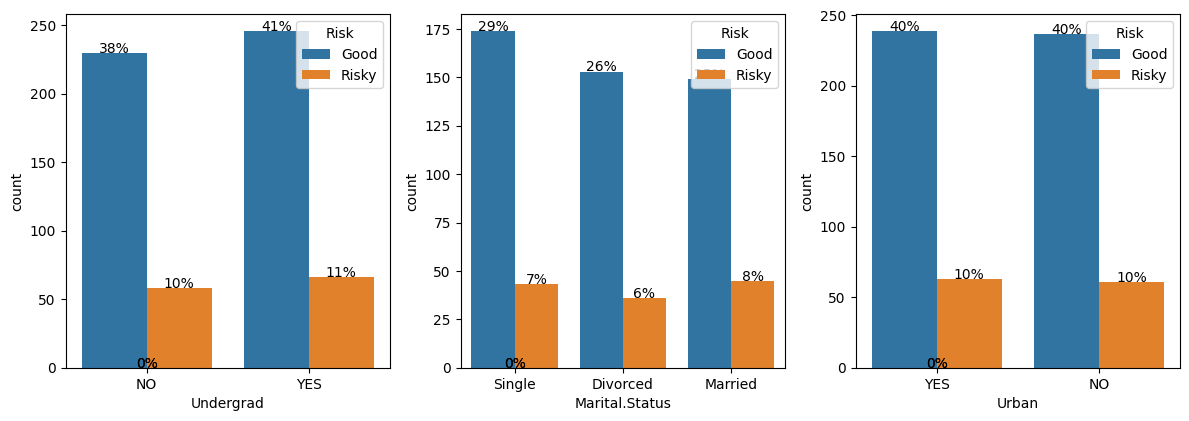

In [8]:

df = pd.DataFrame(data)

# Define Risk based on Taxable Income
df['Risk'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

# Plot count plots for categorical variables with percentages
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Undergrad', hue='Risk')
total = len(df['Undergrad'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.0f}%'.format((height / total) * 100), ha="center")

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Marital.Status', hue='Risk')
total = len(df['Marital.Status'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.0f}%'.format((height / total) * 100), ha="center")

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Urban', hue='Risk')
total = len(df['Urban'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.0f}%'.format((height / total) * 100), ha="center")

plt.tight_layout()
plt.show()

### Observations
#### We cannot find any substantial proof as most of the risky people are on avg 10% in each category 

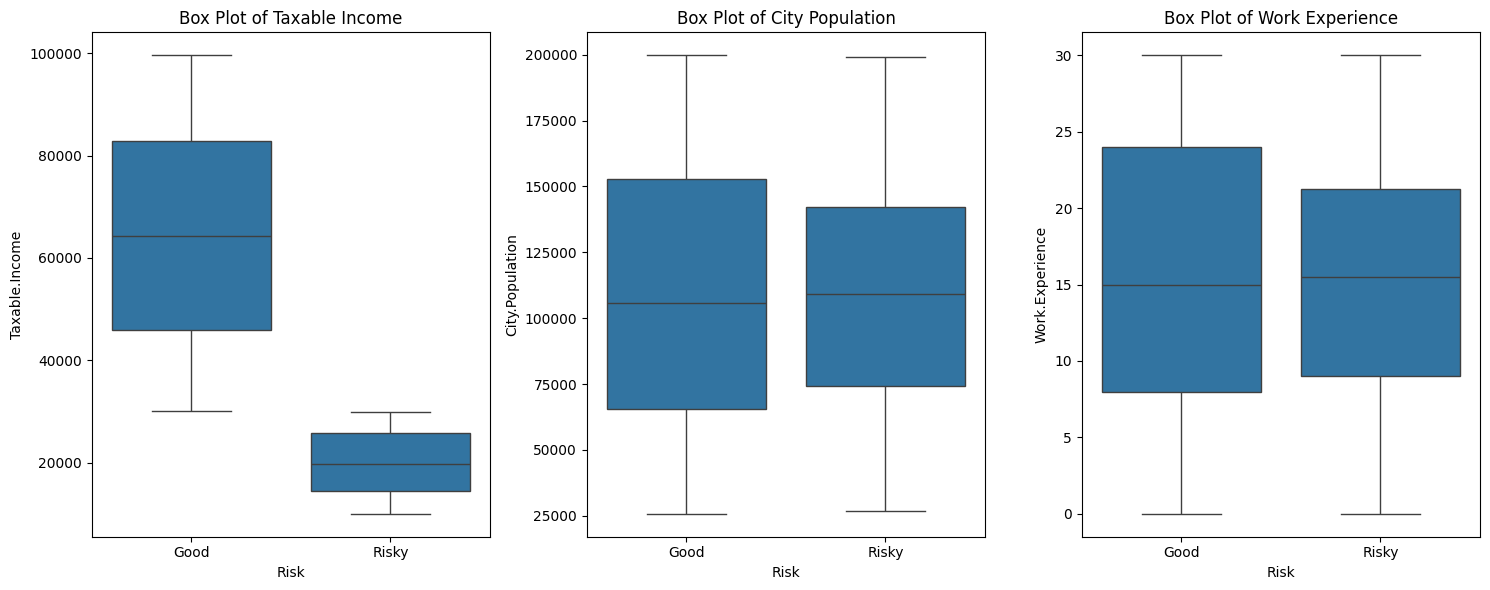

In [9]:
## lets observe with a box plot

# Plot box plots for numerical variables
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Risk', y='Taxable.Income')
plt.title('Box Plot of Taxable Income')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Risk', y='City.Population')
plt.title('Box Plot of City Population')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Risk', y='Work.Experience')
plt.title('Box Plot of Work Experience')

plt.tight_layout()
plt.show()

## Observation
 There is 1 observation which we can see is that most of the risky borrowers will owe less taxable income to the government,which may indicate financial instability or lower earnings.

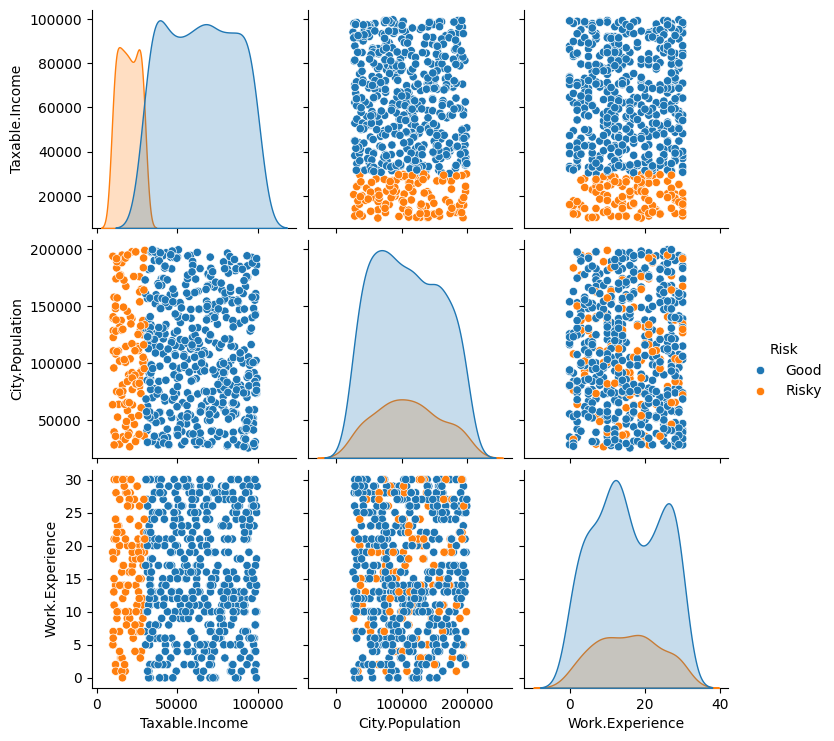

In [11]:
sns.pairplot(data=df, hue='Risk', vars=['Taxable.Income', 'City.Population', 'Work.Experience'])
plt.show()
#This Pair plot furthur proves our earlier assumptions

In [4]:
data[data.duplicated()]#No duplicates

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [5]:
data.info()#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.describe() # we can see that mean and median are around the same so we can say that its normally distributed, so no need for transformations

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
#lets categorize the people with Taxable income(meaning income before tax) below 30k as Risky and others as good
data['Taxable.Income']=np.where(data['Taxable.Income']>30000,'Good','Risky')

In [8]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Taxable.Income' is your target column in the 'data' DataFrame
label_encoder = LabelEncoder()
data['Taxable.Income'] = label_encoder.fit_transform(data['Taxable.Income'])

# Check the mapping of classes to encoded values
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)


Class Mapping: {'Good': 0, 'Risky': 1}


In [9]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numeric_features = ['City.Population','Work.Experience']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Marital.Status','Undergrad','Urban']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        
    ])

In [11]:
data['Taxable.Income'].value_counts()
#Due to the imbalance in the target we used stratified sampling


Taxable.Income
0    476
1    124
Name: count, dtype: int64

In [12]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [13]:
data['Taxable.Income'].value_counts()

Taxable.Income
0    476
1    124
Name: count, dtype: int64

In [15]:
X=data.drop('Taxable.Income',axis=1)
y=data['Taxable.Income'].copy()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Create a pipeline with the ColumnTransformer and a classifier (DecisionTreeClassifier in this example)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier())])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model, e.g., using accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.7


In [17]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)



Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        95
           1       0.18      0.12      0.14        25

    accuracy                           0.70       120
   macro avg       0.48      0.49      0.48       120
weighted avg       0.66      0.70      0.68       120



## This is a good model at the time of non risk or regular times as we want to gain maximum profit from the borrowers, we can change that to high precision and recall for the time when we need to restrict our investment(for example at the times of economy downturn or during recessions) so we increase the threshold of precision and recall to not allow risky borrowers to come 


In [18]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix


y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.2, 0.81, 0.05)

# Initialize variables to store best results
best_precision = 0
best_recall = 0
best_conf_matrix = None
best_threshold = None

# Iterate through thresholds
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba > threshold).astype(int)
    
    # Calculate precision and recall for the minority class
    precision = precision_score(y_test, y_pred_adjusted, pos_label=1)
    recall = recall_score(y_test, y_pred_adjusted, pos_label=1)
    
    # Update best results if the current threshold yields higher precision and recall for the minority class
    if precision + recall > best_precision + best_recall:
        best_precision = precision
        best_recall = recall
        best_threshold = threshold
        best_conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Print the best results for the minority class
print(f"Best Precision for Risky: {best_precision}")
print(f"Best Recall for Risky: {best_recall}")
print(f"Best Threshold for Risky: {best_threshold}")
print(f"Confusion Matrix at Best Threshold for Risky:\n{best_conf_matrix}")


Best Precision for Risky: 0.17647058823529413
Best Recall for Risky: 0.12
Best Threshold for Risky: 0.2
Confusion Matrix at Best Threshold for Risky:
[[81 14]
 [22  3]]


In [ ]:
#We can improve upon this by taking more values in the model so that we get more data of the risky borrowers